In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
%matplotlib inline
import pandas as pd

In [2]:
os.chdir("Machine-Learning\human and animal")

In [3]:
if os.path.isdir('train/dog')is False:
    os.makedirs('train/dog')
    os.makedirs('train/cat')
    os.makedirs('train/rider')
    os.makedirs('train/horse')
    os.makedirs('test/dog')
    os.makedirs('test/cat')
    os.makedirs('test/rider')
    os.makedirs('test/horse')

In [10]:
    for c in random.sample(glob.glob('cat*'),100):
        shutil.move(c,'train/cat')
        
    for c in random.sample(glob.glob('dog*'),100):
        shutil.move(c,'train/dog')
    
    for c in random.sample(glob.glob('rider*'),100):
        shutil.move(c,'train/rider')
        
    for c in random.sample(glob.glob('horse*'),100):
        shutil.move(c,'train/horse')
    
    for c in random.sample(glob.glob('cat*'),50):
        shutil.move(c,'test/cat')
    
    for c in random.sample(glob.glob('dog*'),50):
        shutil.move(c,'test/dog')
        
    for c in random.sample(glob.glob('rider*'),50):
        shutil.move(c,'test/rider')
        
    for c in random.sample(glob.glob('horse*'),50):
        shutil.move(c,'test/horse')    
        
        

In [11]:
os.chdir('../../')

In [12]:
train_path = 'Machine-Learning\human and animal/train'
test_path =  'Machine-Learning\human and animal/test'

In [13]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path,target_size=(224,224),classes=['cat','dog','horse','rider'],batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path,target_size=(224,224),classes=['cat','dog','horse','rider'],batch_size=10,shuffle = False)

Found 400 images belonging to 4 classes.
Found 200 images belonging to 4 classes.


In [14]:
assert train_batches.n == 400
assert test_batches.n == 200
assert train_batches.num_classes == test_batches.num_classes == 4

In [15]:
imgs,labels = next(train_batches)

In [16]:
def plotImages(images_arr):
    fig,axes = plt.subplots(1,10,figsize = (10,20))
    axes = axes.flatten()
    for img,ax in  zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

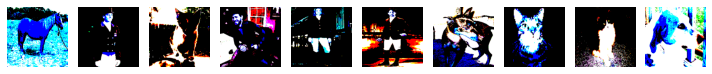

[[0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]


In [17]:
plotImages(imgs)
print(labels)

In [18]:
model = Sequential([
    Conv2D(filters=32,kernel_size=(3,3),activation='relu',padding='same',input_shape = (224,224,3)),
    MaxPool2D(pool_size=(2,2),strides=2),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    MaxPool2D(pool_size=(2,2),strides=2),
    Flatten(),
    Dense(units=4,activation='softmax')
    
    
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 200704)            0         
                                                                 
 dense (Dense)               (None, 4)                 8

In [21]:
model.compile(optimizer=Adam(learning_rate = 0.0001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [22]:
model.fit(x= train_batches,epochs=10,verbose=2)

Epoch 1/10
40/40 - 21s - loss: 46.1584 - accuracy: 0.3550 - 21s/epoch - 525ms/step
Epoch 2/10
40/40 - 18s - loss: 8.1345 - accuracy: 0.6500 - 18s/epoch - 445ms/step
Epoch 3/10
40/40 - 18s - loss: 2.0587 - accuracy: 0.8425 - 18s/epoch - 446ms/step
Epoch 4/10
40/40 - 18s - loss: 0.3108 - accuracy: 0.9475 - 18s/epoch - 453ms/step
Epoch 5/10
40/40 - 18s - loss: 0.4323 - accuracy: 0.9500 - 18s/epoch - 457ms/step
Epoch 6/10
40/40 - 18s - loss: 0.2014 - accuracy: 0.9700 - 18s/epoch - 453ms/step
Epoch 7/10
40/40 - 18s - loss: 0.1371 - accuracy: 0.9725 - 18s/epoch - 444ms/step
Epoch 8/10
40/40 - 19s - loss: 0.0151 - accuracy: 0.9950 - 19s/epoch - 464ms/step
Epoch 9/10
40/40 - 18s - loss: 0.0143 - accuracy: 0.9975 - 18s/epoch - 451ms/step
Epoch 10/10
40/40 - 18s - loss: 6.4777e-04 - accuracy: 1.0000 - 18s/epoch - 447ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

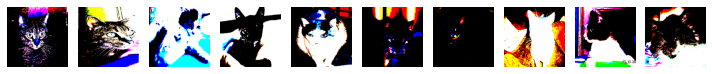

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]]


In [23]:
test_imgs,test_labels = next(test_batches)
plotImages(test_imgs)
print(test_labels)

In [24]:
test_batches.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3])

In [25]:
predictions = model.predict(x=test_batches,verbose = 0)

In [28]:
np.round(predictions)

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],


In [29]:
cm = confusion_matrix(y_true = test_batches.classes,y_pred = np.argmax(predictions,axis = -1))

In [30]:
cm

array([[29, 11,  4,  6],
       [21, 16,  6,  7],
       [ 7,  6, 33,  4],
       [ 7,  3,  3, 37]], dtype=int64)

In [31]:
y_true = test_batches.classes

In [32]:
y_pred = np.argmax(predictions,axis = -1)

In [33]:
pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,2,3,All
True,,,,,
0,29,11,4,6,50
1,21,16,6,7,50
2,7,6,33,4,50
3,7,3,3,37,50
All,64,36,46,54,200
